In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import NearestNeighbors

In [2]:
df = pd.read_csv('customer_purchase_data.csv')
df.head(10)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
5,66,1,37758.117475,14,4,17.827493,0,2,0
6,39,1,126883.385286,16,3,42.085384,1,4,1
7,64,1,39707.359724,13,2,17.190292,1,0,0
8,43,0,102797.301269,20,1,6.023475,0,3,0
9,20,1,63854.921080,16,0,38.572466,0,5,1


In [3]:
df.PurchaseStatus.value_counts()

PurchaseStatus
0    852
1    648
Name: count, dtype: int64

In [7]:
df.dtypes

Age                     int64
Gender                  int64
AnnualIncome          float64
NumberOfPurchases       int64
ProductCategory         int64
TimeSpentOnWebsite    float64
LoyaltyProgram          int64
DiscountsAvailed        int64
PurchaseStatus          int64
dtype: object

In [9]:
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

In [11]:
df.duplicated().sum()

112

In [13]:
df.drop_duplicates()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


In [15]:
df.dtypes

Age                     int64
Gender                  int64
AnnualIncome          float64
NumberOfPurchases       int64
ProductCategory         int64
TimeSpentOnWebsite    float64
LoyaltyProgram          int64
DiscountsAvailed        int64
PurchaseStatus          int64
dtype: object

In [17]:
Q1 = df['AnnualIncome'].quantile(0.25)
Q3 = df['AnnualIncome'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

Outliers_AnnualIncome = df[(df['AnnualIncome']<lower_bound) | (df['AnnualIncome']>upper_bound)]
if Outliers_AnnualIncome.empty:
    print("ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ AnnualIncome")
else:
    print(Outliers_AnnualIncome['AnnualIncome'])

-43179.2113978119
213375.9634107995
ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ AnnualIncome


In [19]:
Q1 = df['NumberOfPurchases'].quantile(0.25)
Q3 = df['NumberOfPurchases'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

Outliers_NumberOfPurchases = df[(df['NumberOfPurchases']<lower_bound) | (df['NumberOfPurchases']>upper_bound)]
if Outliers_NumberOfPurchases.empty:
    print("ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ NumberOfPurchases")
else:
    print(Outliers_NumberOfPurchases['NumberOfPurchases'])

-10.0
30.0
ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ NumberOfPurchases


In [21]:
Q1 = df['TimeSpentOnWebsite'].quantile(0.25)
Q3 = df['TimeSpentOnWebsite'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

Outliers_TimeSpentOnWebsite = df[(df['TimeSpentOnWebsite']<lower_bound) | (df['TimeSpentOnWebsite']>upper_bound)]
if Outliers_NumberOfPurchases.empty:
    print("ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ TimeSpentOnWebsite")
else:
    print(Outliers_TimeSpentOnWebsite['TimeSpentOnWebsite'])

-26.16304342243758
86.68960611494387
ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ TimeSpentOnWebsite


In [23]:
Q1 = df['DiscountsAvailed'].quantile(0.25)
Q3 = df['DiscountsAvailed'].quantile(0.75)
IQR = Q3-Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

Outliers_DiscountsAvailed = df[(df['DiscountsAvailed']<lower_bound) | (df['DiscountsAvailed']>upper_bound)]
if Outliers_DiscountsAvailed.empty:
    print("ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ DiscountsAvailed")
else:
    print(Outliers_DiscountsAvailed['DiscountsAvailed'])

-3.5
8.5
ไม่เจอข้อมูลนอกเกณฑ์ในสดมภ์ DiscountsAvailed


In [25]:
# X,Y Train test split
X = df.drop('PurchaseStatus',axis='columns')
y = testLabels = df.PurchaseStatus.astype(np.float32)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the Generator Network
class Generator(nn.Module):
    def __init__(self, input_dim, label_dim, output_dim):
        super(Generator, self).__init__()
        self.label_embedding = nn.Embedding(label_dim, label_dim)

        self.model = nn.Sequential(
            nn.Linear(input_dim + label_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.BatchNorm1d(256, 0.8),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.BatchNorm1d(512, 0.8),
            nn.ReLU(True),
            nn.Linear(512, output_dim),
            nn.Tanh()
        )

    def forward(self, noise, labels):
        label_input = self.label_embedding(labels)
        gen_input = torch.cat((noise, label_input), -1)
        return self.model(gen_input)

# Define the Discriminator Network
class Discriminator(nn.Module):
    def __init__(self, input_dim, label_dim):
        super(Discriminator, self).__init__()
        self.label_embedding = nn.Embedding(label_dim, label_dim)

        self.model = nn.Sequential(
            nn.Linear(input_dim + label_dim, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )

    def forward(self, img, labels):
        label_input = self.label_embedding(labels)
        disc_input = torch.cat((img, label_input), -1)
        return self.model(disc_input)

# Function to train the GAN
def train_gan(data_loader, epochs, generator, discriminator, optimizer_G, optimizer_D, adversarial_loss, device):
    generated_data = []  # Collect generated data samples

    for epoch in range(epochs):
        for i, (real_samples, labels) in enumerate(data_loader):
            real_samples, labels = real_samples.to(device), labels.long().to(device)
            batch_size = real_samples.size(0)

            # Ground truths
            valid = torch.ones((batch_size, 1), requires_grad=False).to(device)
            fake = torch.zeros((batch_size, 1), requires_grad=False).to(device)

            # Train Generator
            optimizer_G.zero_grad()
            z = torch.randn(batch_size, input_dim).to(device)
            gen_labels = torch.randint(0, label_dim, (batch_size,)).long().to(device)
            gen_samples = generator(z, gen_labels)

            validity = discriminator(gen_samples, gen_labels)
            g_loss = adversarial_loss(validity, valid)
            g_loss.backward()
            optimizer_G.step()

            # Train Discriminator
            optimizer_D.zero_grad()
            real_pred = discriminator(real_samples, labels)
            d_real_loss = adversarial_loss(real_pred, valid)

            fake_pred = discriminator(gen_samples.detach(), gen_labels)
            d_fake_loss = adversarial_loss(fake_pred, fake)

            d_loss = (d_real_loss + d_fake_loss) / 2
            d_loss.backward()
            optimizer_D.step()

            # Collect generated data at the last epoch
            if epoch == epochs - 1:
                generated_data.append(gen_samples.cpu().detach().numpy())

        print(f"Epoch {epoch}/{epochs} | D Loss: {d_loss.item()} | G Loss: {g_loss.item()}")

    return np.vstack(generated_data)  # Combine all generated data into one array

# Initial parameters
device = torch.device("cpu")
input_dim = 100  # Noise dimension
output_dim = X_train.shape[1]  # Adjust to match the number of features
label_dim = 2  # Binary classification

# Create and initialize models
generator = Generator(input_dim, label_dim, output_dim).to(device)
discriminator = Discriminator(output_dim, label_dim).to(device)
adversarial_loss = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Convert training data to Tensor and DataLoader
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Train CSAGAN-DE model and generate synthetic data
generated_data = train_gan(train_loader, epochs=100, generator=generator, discriminator=discriminator,
                           optimizer_G=optimizer_G, optimizer_D=optimizer_D, adversarial_loss=adversarial_loss, device=device)

# Combine generated data with original training data
 = np.vstack((X_train.values, generated_data))
y_train_combined = np.hstack((y_train.values, np.ones(generated_data.shape[0])))  # Assuming generated data is from the minority class


Epoch 0/100 | D Loss: 0.32695186138153076 | G Loss: 0.7354394197463989
Epoch 1/100 | D Loss: 0.32399046421051025 | G Loss: 0.7410181760787964
Epoch 2/100 | D Loss: 0.3021261394023895 | G Loss: 0.7912101149559021
Epoch 3/100 | D Loss: 0.2739967107772827 | G Loss: 0.8632673621177673
Epoch 4/100 | D Loss: 0.25331395864486694 | G Loss: 0.9228713512420654
Epoch 5/100 | D Loss: 0.22475838661193848 | G Loss: 1.0160634517669678
Epoch 6/100 | D Loss: 0.2127281278371811 | G Loss: 1.0602632761001587
Epoch 7/100 | D Loss: 0.20336125791072845 | G Loss: 1.0963913202285767
Epoch 8/100 | D Loss: 0.18231187760829926 | G Loss: 1.186702013015747
Epoch 9/100 | D Loss: 0.1661291867494583 | G Loss: 1.2639927864074707
Epoch 10/100 | D Loss: 0.13749480247497559 | G Loss: 1.4265607595443726
Epoch 11/100 | D Loss: 0.12852884829044342 | G Loss: 1.4861680269241333
Epoch 12/100 | D Loss: 0.12185639888048172 | G Loss: 1.5380820035934448
Epoch 13/100 | D Loss: 0.10844363272190094 | G Loss: 1.6389611959457397
Epoch 1

In [29]:
X_train_combined.shape

(2100, 8)

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
# Prepare function for model evaluation
def evaluate_model(model_name, y_val, y_pred, y_prob):
    # Print confusion matrix and classification report
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))
    
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_prob)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"AUC: {auc:.4f}")
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} ROC curve (AUC = {auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc='lower right')
    plt.show()
    
    return accuracy, precision, recall, auc

Confusion Matrix:
[[220  36]
 [ 23 171]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.86      0.88       256
         1.0       0.83      0.88      0.85       194

    accuracy                           0.87       450
   macro avg       0.87      0.87      0.87       450
weighted avg       0.87      0.87      0.87       450

Accuracy: 0.8689
Precision: 0.8261
Recall: 0.8814
AUC: 0.9202


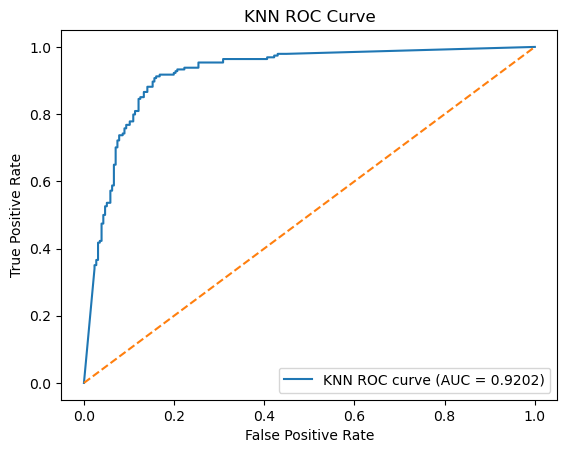

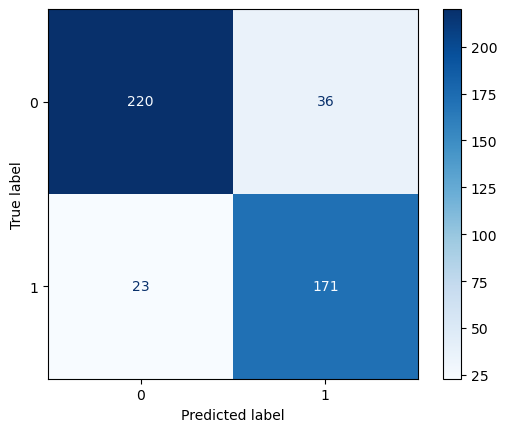

Best parameters found by GridSearchCV for KNN:
{'knn__metric': 'euclidean', 'knn__n_neighbors': 5, 'knn__weights': 'distance'}


In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
# Define the parameter grid for KNN
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9,],       # Number of neighbors to use
    'knn__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'knn__metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create a pipeline to scale the data and apply KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),            # Step to scale the data
    ('knn', KNeighborsClassifier())          # KNeighborsClassifier model
])

# GridSearchCV with pipeline for KNN
grid_search_knn = GridSearchCV(pipeline, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_knn.fit(X_train_combined, y_train_combined)

# Predict and evaluate KNN
knn_best = grid_search_knn.best_estimator_
y_pred_knn = knn_best.predict(X_test)
y_prob_knn = knn_best.predict_proba(X_test)[:, 1]

# Print metrics (Assuming the same print_metrics function exists)
evaluate_model("KNN", y_test, y_pred_knn, y_prob_knn)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Create a ConfusionMatrixDisplay with a custom color map (cmap)
disp = ConfusionMatrixDisplay(conf_matrix)

# Plot the confusion matrix with a specific colormap, e.g., 'Blues'
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

# Print the best parameters for KNN
print("Best parameters found by GridSearchCV for KNN:")
print(grid_search_knn.best_params_)

Confusion Matrix:
[[228  28]
 [ 33 161]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88       256
         1.0       0.85      0.83      0.84       194

    accuracy                           0.86       450
   macro avg       0.86      0.86      0.86       450
weighted avg       0.86      0.86      0.86       450

Accuracy: 0.8644
Precision: 0.8519
Recall: 0.8299
AUC: 0.9164


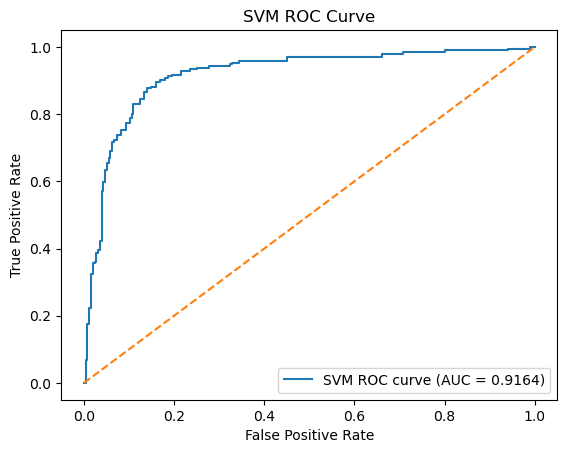

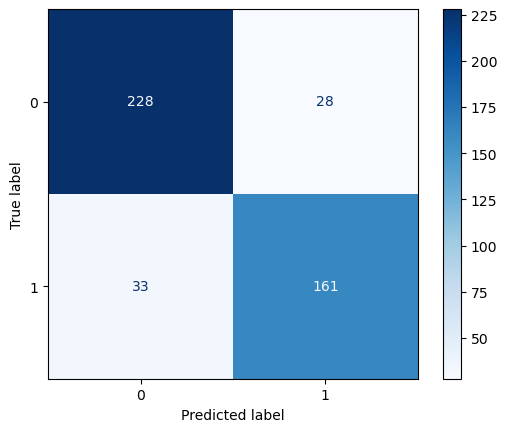

Best parameters found by GridSearchCV:
{'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}


In [96]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the parameter grid for SVM
param_grid_svm = {'svc__C': [0.1, 1, 10], 'svc__gamma': ['scale', 'auto'], 'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Create a pipeline to scale the data and apply SVC
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step to scale the data
    ('svc', SVC(probability=True))  # SVC model with probability=True
])

# GridSearchCV with pipeline
grid_search_svm = GridSearchCV(pipeline, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_svm.fit(X_train_combined, y_train_combined)

# Predict and evaluate SVM
svm_best = grid_search_svm.best_estimator_
y_pred_svm = svm_best.predict(X_test)
y_prob_svm = svm_best.predict_proba(X_test)[:, 1]

# Print metrics
evaluate_model("SVM", y_test, y_pred_svm, y_prob_svm)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_svm)

# Create a ConfusionMatrixDisplay with a custom color map (cmap)
disp = ConfusionMatrixDisplay(conf_matrix)

# Plot the confusion matrix with a specific colormap, e.g., 'Blues'
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()

# Print the best parameters
print("Best parameters found by GridSearchCV:")
print(grid_search_svm.best_params_)

Confusion Matrix:
[[226  30]
 [179  15]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.88      0.68       256
         1.0       0.33      0.08      0.13       194

    accuracy                           0.54       450
   macro avg       0.45      0.48      0.40       450
weighted avg       0.46      0.54      0.44       450

Accuracy: 0.5356
Precision: 0.3333
Recall: 0.0773
AUC: 0.4119


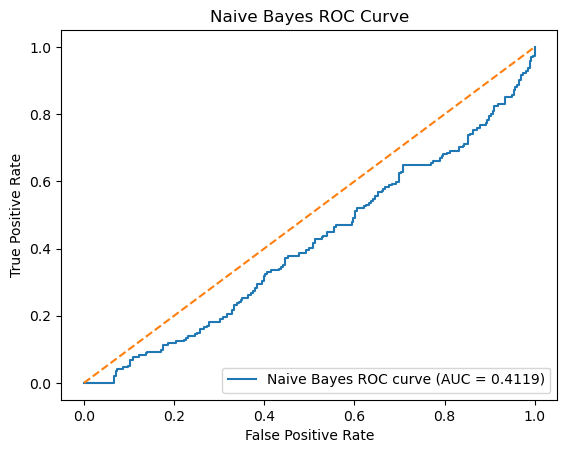

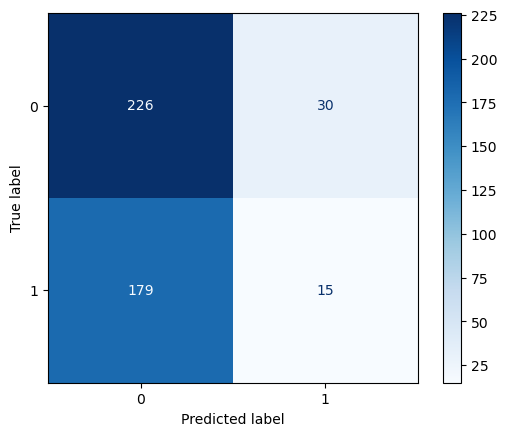

In [98]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Since GaussianNB does not have many hyperparameters to tune, we will just fit it in the pipeline
param_grid_nb = {}

# Create a pipeline to scale the data and apply GaussianNB
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # Step to scale the data
    ('nb', GaussianNB())            # GaussianNB model
])

# GridSearchCV with pipeline (no parameter grid for Naive Bayes)
grid_search_nb = GridSearchCV(pipeline, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with scaled data
grid_search_nb.fit(X_train_combined, y_train_combined)

# Predict and evaluate Naive Bayes
nb_best = grid_search_nb.best_estimator_
y_pred_nb = nb_best.predict(X_test)
y_prob_nb = nb_best.predict_proba(X_test)[:, 1]

# Print metrics (Assuming the same print_metrics function exists)
evaluate_model("Naive Bayes", y_test, y_pred_nb, y_prob_nb)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Create a ConfusionMatrixDisplay with a custom color map (cmap)
disp = ConfusionMatrixDisplay(conf_matrix)

# Plot the confusion matrix with a specific colormap, e.g., 'Blues'
disp.plot(cmap=plt.cm.Blues)

# Show the plot
plt.show()


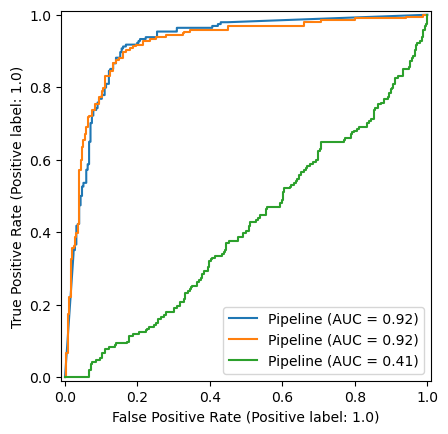

In [100]:
# ROC curve for all models
plt_roc = RocCurveDisplay.from_estimator(knn_best, X_test, y_test)
RocCurveDisplay.from_estimator(svm_best, X_test, y_test, ax=plt_roc.ax_)
RocCurveDisplay.from_estimator(nb_best, X_test, y_test, ax=plt_roc.ax_)
plt.show()